# Лаборатораня работа №16 Линейная и логистическая регрессия

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',')
print(df.info(), "\n")
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None 



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
# отбор числовых колонок (Числовые признаки)

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
print(df_numeric)

['id' 'age' 'hypertension' 'heart_disease' 'avg_glucose_level' 'bmi'
 'stroke']
         id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0      9046  67.0             0              1             228.69  36.6   
1     51676  61.0             0              0             202.21   NaN   
2     31112  80.0             0              1             105.92  32.5   
3     60182  49.0             0              0             171.23  34.4   
4      1665  79.0             1              0             174.12  24.0   
...     ...   ...           ...            ...                ...   ...   
5105  18234  80.0             1              0              83.75   NaN   
5106  44873  81.0             0              0             125.20  40.0   
5107  19723  35.0             0              0              82.99  30.6   
5108  37544  51.0             0              0             166.29  25.6   
5109  44679  44.0             0              0              85.28  26.2   

      stroke  
0   

In [4]:
# Внесение недостающих значений

med = df['bmi'].median()
print(med)
df_med = df
df_med['bmi'] = df_med['bmi'].fillna(med)

df_numeric = df_med.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
df_numeric

28.1


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,28.1,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [5]:
# отбор нечисловых колонок (Категориальные признаки)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)
print(df_non_numeric)

['gender' 'ever_married' 'work_type' 'Residence_type' 'smoking_status']
      gender ever_married      work_type Residence_type   smoking_status
0       Male          Yes        Private          Urban  formerly smoked
1     Female          Yes  Self-employed          Rural     never smoked
2       Male          Yes        Private          Rural     never smoked
3     Female          Yes        Private          Urban           smokes
4     Female          Yes  Self-employed          Rural     never smoked
...      ...          ...            ...            ...              ...
5105  Female          Yes        Private          Urban     never smoked
5106  Female          Yes  Self-employed          Urban     never smoked
5107  Female          Yes  Self-employed          Rural     never smoked
5108    Male          Yes        Private          Rural  formerly smoked
5109  Female          Yes       Govt_job          Urban          Unknown

[5110 rows x 5 columns]


## Подготовка данных

In [6]:
x_y = df[['avg_glucose_level', 'age']]
x_y

,avg_glucose_level,age
0,228.69,67.0
1,202.21,61.0
2,105.92,80.0
3,171.23,49.0
4,174.12,79.0
...,...,...
5105,83.75,80.0
5106,125.20,81.0
5107,82.99,35.0
5108,166.29,51.0


In [7]:
new_ind = np.arange(100)
np.random.shuffle(new_ind)
new_ind #

array([79, 84, 22, 70, 16, 82, 30, 98, 12, 38, 46, 80,  4, 91, 61, 90, 74,
       88, 64, 73, 34, 13, 56, 81,  3, 87, 43, 86, 23, 59, 15, 58,  5, 52,
        1,  6, 83, 97, 24, 93, 39, 36, 68, 62, 65, 57, 89,  9, 85, 26, 44,
       48, 42, 28, 54, 71, 37, 96, 77, 53, 49, 17, 95,  8, 75,  2, 76, 92,
       40, 18, 72, 33, 63, 14, 45, 99, 60,  0, 67,  7, 51, 69, 29, 66, 20,
       10, 41, 27, 31, 50, 32, 55, 78, 19, 11, 94, 25, 21, 47, 35])

In [8]:
train_idx = new_ind[:70]
test_idx = new_ind[70:]

train_idx

array([79, 84, 22, 70, 16, 82, 30, 98, 12, 38, 46, 80,  4, 91, 61, 90, 74,
       88, 64, 73, 34, 13, 56, 81,  3, 87, 43, 86, 23, 59, 15, 58,  5, 52,
        1,  6, 83, 97, 24, 93, 39, 36, 68, 62, 65, 57, 89,  9, 85, 26, 44,
       48, 42, 28, 54, 71, 37, 96, 77, 53, 49, 17, 95,  8, 75,  2, 76, 92,
       40, 18])

In [9]:
x_y_train = x_y.iloc[train_idx]

<Axes: >

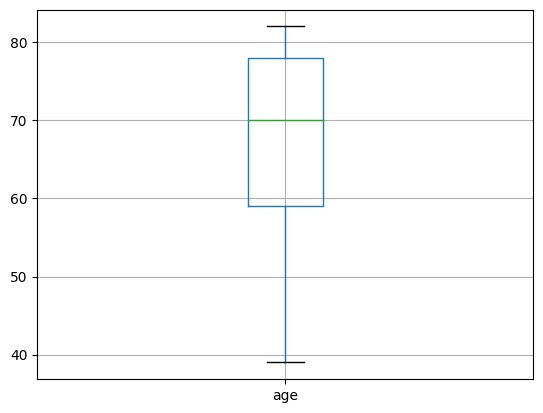

In [10]:
x_y_train.boxplot(column=['age'])

In [11]:
x_y_train

,avg_glucose_level,age
79,143.43,43.0
84,71.20,58.0
22,228.70,79.0
70,62.57,76.0
16,191.61,64.0
...,...,...
2,105.92,80.0
76,240.09,80.0
92,68.02,57.0
40,78.03,78.0


In [12]:
# используя эти индексы разделим массивы данных на обучающие и тестовые
x_train, y_train = x_y_train['avg_glucose_level'], x_y_train['age']# обучающие вход и желаемый выход
x_test, y_test = x_y['avg_glucose_level'][test_idx], x_y['age'][test_idx]# тестовые вход и желаемый выход

## Линейная регрессия

In [13]:
df_numeric

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,28.1,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [14]:
df.shape

(5110, 12)

In [15]:
train, test = train_test_split(df, test_size=0.4)
train.shape, test.shape

((3066, 12), (2044, 12))

In [16]:
categorial_features = ['gender', 'work_type', 'Residence_type', 'smoking_status']  # категориальные признаки
real_features = ['age', 'bmi', 'avg_glucose_level']  # вещественные признаки
target_feature = 'stroke'  # целевой признак

In [17]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
train_cat

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [18]:
encoder.categories_

[array(['Female', 'Male', 'Other'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

In [19]:
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

(3066, 13)

In [20]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем

LinearRegression()

In [21]:
model.coef_

array([ 0.00297526, -0.00055911,  0.00036829,  0.00594929, -0.00455915,
        0.05144451,  0.01282698, -0.00214057,  0.07841943,  0.00175714,
       -0.00350669, -0.00918066,  0.00359698])

In [22]:
model.intercept_

-0.12238056225992855

In [23]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

In [24]:
test_preds = model.predict(X_test)

In [25]:
np.sqrt(((test[target_feature] - test_preds) ** 2).mean())

0.21364185668450522

In [26]:
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5

0.21364185668450522

In [27]:
metrics.mean_absolute_error(test[target_feature], test_preds)

0.09807681691944088

In [28]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

mean_absolute_percentage_error(test[target_feature], test_preds)

inf

In [29]:
train_preds = model.predict(X_train)

metrics.mean_squared_error(train[target_feature], train_preds) ** 0.5, \
metrics.mean_absolute_error(train[target_feature], train_preds), \
mean_absolute_percentage_error(train[target_feature], train_preds)

(0.20249067789093642, 0.09342041820872779, inf)

In [30]:
df_numeric['Категория'] = pd.cut(df_numeric['age'], bins=[0, 50, 100], labels=[0, 1]).astype(int)
df_numeric['Категория'].value_counts()
df_numeric

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Категория
0,9046,67.0,0,1,228.69,36.6,1,1
1,51676,61.0,0,0,202.21,28.1,1,1
2,31112,80.0,0,1,105.92,32.5,1,1
3,60182,49.0,0,0,171.23,34.4,1,0
4,1665,79.0,1,0,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0,1
5106,44873,81.0,0,0,125.20,40.0,0,1
5107,19723,35.0,0,0,82.99,30.6,0,0
5108,37544,51.0,0,0,166.29,25.6,0,1


In [31]:
x_y = df_numeric[['avg_glucose_level', 'Категория']]
x_y

,avg_glucose_level,Категория
0,228.69,1
1,202.21,1
2,105.92,1
3,171.23,0
4,174.12,1
...,...,...
5105,83.75,1
5106,125.20,1
5107,82.99,0
5108,166.29,1


In [32]:
new_ind = np.arange(5000)
np.random.shuffle(new_ind)
new_ind #

array([2639,  698, 4688, ..., 2248, 3377,  472])

In [33]:
train_idx = new_ind[:3500]
test_idx = new_ind[3500:]

In [34]:
x_y_train = x_y.iloc[train_idx]

In [35]:
# используя эти индексы разделим массивы данных на обучающие и тестовые
x_train, y_train = x_y_train['avg_glucose_level'], x_y_train['Категория']# обучающие вход и желаемый выход
x_test, y_test = x_y['avg_glucose_level'][test_idx], x_y['Категория'][test_idx]# тестовые вход и желаемый выход

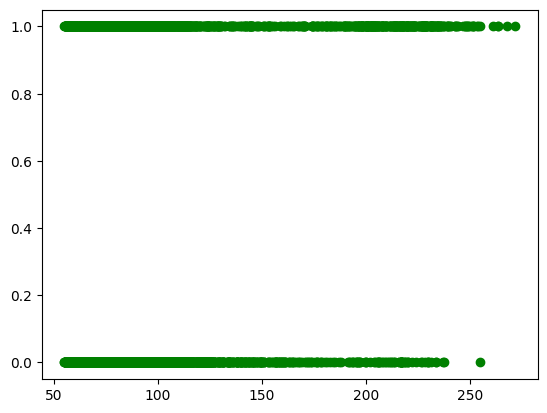

In [36]:
plt.scatter(x_train, y_train, color='green') # рисуем обучающие данные, зависимость желаемого выхода от входа

In [37]:
lr = 1e-6 # шаг обучения
epochs = 5000 # количество эпох

a =  np.random.randn(1) # случайное число для параметра a
a

array([0.8190274])

In [38]:
b = np.random.rand(1) # случайное число для параметра b
b

array([0.88722617])

In [39]:
# ЦИКЛ ОБУЧЕНИЯ
Loss=[]# массив для значений функции ошибки
for ep in range(epochs): # в цикле по количеству эпох
    y_pred = b + a*x_train # считаем выход модели для всех примеров входов с текущими значениями параметров модели
    error = (y_pred - y_train) # считаем разницу между полученным выходом и тем, который должен был быть

    loss = (error**2).mean() # считаем суммарную ошибку. Функция среднего mean() как замена суммирования по всем примерам
    Loss.append(loss) # добавлем текущее значение в массив
    b_grad = 2 * error.mean() # считаем производную по параметру, смещению b (на 2 можно не умножать включив его в lr)
    a_grad = 2 * (x_train * error).mean() # считаем производную по параметру, множителю a

    # обучение = изменение параметров
    a = a - lr*a_grad # изменяем параметр a
    b = b - lr*b_grad # изменяем параметр b

    if ep % 20 == 0 or ep==epochs-1: # каждые 20 эпох будем
        print('ep: %3d  loss: %8.6f   a=%4.3f  b=%4.3f'%(ep,loss,a,b)) # печатать значение функции ошибки

ep:   0  loss: 8972.150672   a=0.797  b=0.887
ep:  20  loss: 3060.271253   a=0.464  b=0.884
ep:  40  loss: 1043.950759   a=0.270  b=0.883
ep:  60  loss: 356.259408   a=0.156  b=0.882
ep:  80  loss: 121.713663   a=0.090  b=0.881
ep: 100  loss: 41.718899   a=0.051  b=0.881
ep: 120  loss: 14.435682   a=0.028  b=0.881
ep: 140  loss: 5.130399   a=0.015  b=0.881
ep: 160  loss: 1.956715   a=0.008  b=0.881
ep: 180  loss: 0.874290   a=0.003  b=0.881
ep: 200  loss: 0.505114   a=0.000  b=0.881
ep: 220  loss: 0.379202   a=-0.001  b=0.881
ep: 240  loss: 0.336257   a=-0.002  b=0.881
ep: 260  loss: 0.321609   a=-0.003  b=0.881
ep: 280  loss: 0.316613   a=-0.003  b=0.881
ep: 300  loss: 0.314908   a=-0.003  b=0.881
ep: 320  loss: 0.314326   a=-0.003  b=0.881
ep: 340  loss: 0.314127   a=-0.003  b=0.881
ep: 360  loss: 0.314058   a=-0.003  b=0.881
ep: 380  loss: 0.314034   a=-0.003  b=0.881
ep: 400  loss: 0.314025   a=-0.003  b=0.881
ep: 420  loss: 0.314021   a=-0.003  b=0.881
ep: 440  loss: 0.314019   a=

In [40]:
y_test_pred = b + a*x_test # рассчитаем выходы модели на тестовых примерах входов
#у нас уже были соответствующие желаемые тестовые выходы для них в y_test
y_test_pred

3442    0.485657
3772    0.235416
1802    0.598427
4603    0.613833
3847    0.401696
          ...   
3943    0.200662
4475    0.153294
2248    0.625625
3377    0.584729
472     0.632983
Name: avg_glucose_level, Length: 1500, dtype: float64

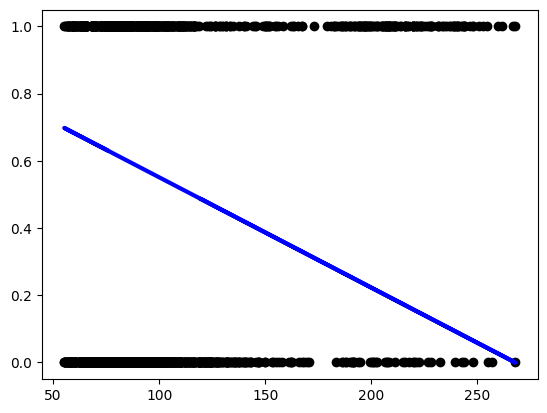

In [41]:
# нарисуем
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)
plt.show()

## Логистическая регрессия

In [42]:
df_numeric = df_numeric.drop(columns=['id'])
df_numeric

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Категория
0,67.0,0,1,228.69,36.6,1,1
1,61.0,0,0,202.21,28.1,1,1
2,80.0,0,1,105.92,32.5,1,1
3,49.0,0,0,171.23,34.4,1,0
4,79.0,1,0,174.12,24.0,1,1
...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,1
5106,81.0,0,0,125.20,40.0,0,1
5107,35.0,0,0,82.99,30.6,0,0
5108,51.0,0,0,166.29,25.6,0,1


In [43]:
X=df_numeric.iloc[:,:5]
y=df_numeric.iloc[:,5]
X

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,28.1
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0
...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1
5106,81.0,0,0,125.20,40.0
5107,35.0,0,0,82.99,30.6
5108,51.0,0,0,166.29,25.6


In [44]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [45]:
#разбиваем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi
1100,67.0,0,0,68.61,31.9
3144,79.0,0,0,82.07,30.4
702,45.0,0,0,80.93,23.1
1825,48.0,0,0,84.56,41.8
4104,62.0,0,0,212.62,35.8
...,...,...,...,...,...
4931,53.0,1,0,98.61,38.8
3264,61.0,0,0,72.01,26.0
1653,44.0,0,0,94.71,28.4
2607,21.0,0,0,120.94,29.7


In [46]:
from sklearn.linear_model import LogisticRegression

#настройка параметров модели
model = LogisticRegression()
y_scor=model.fit(X_train, y_train)
y_score=y_scor.predict(X_test)

In [47]:
from sklearn import metrics
# оценка точности модели
print(metrics.classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2433
           1       0.00      0.00      0.00       122

    accuracy                           0.95      2555
   macro avg       0.48      0.50      0.49      2555
weighted avg       0.91      0.95      0.93      2555



Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

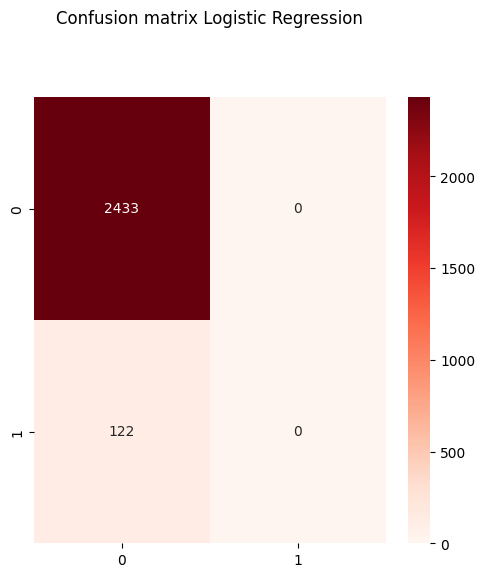

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig = plt.figure(figsize = (5,5))
ax = fig.gca()

# матрица неточности
cnf_matrix_log = confusion_matrix(y_test, y_score)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

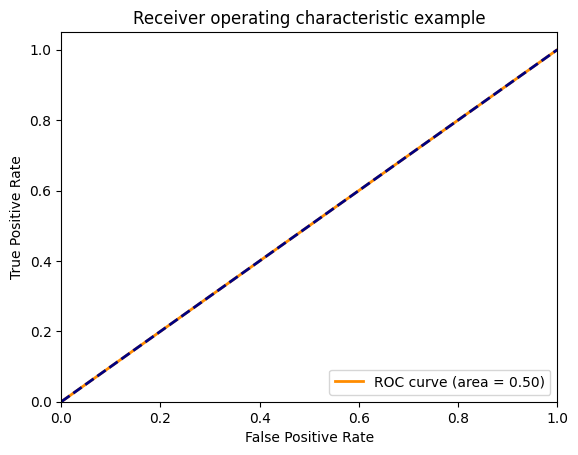

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Логистическая регрессия 2

In [50]:
df_new = df_numeric.drop(columns=['Категория'])
df_new

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [51]:
X = df_new.iloc[:, :5]
y = df_new['stroke']
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [52]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,28.1
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0
...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1
5106,81.0,0,0,125.20,40.0
5107,35.0,0,0,82.99,30.6
5108,51.0,0,0,166.29,25.6


In [53]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

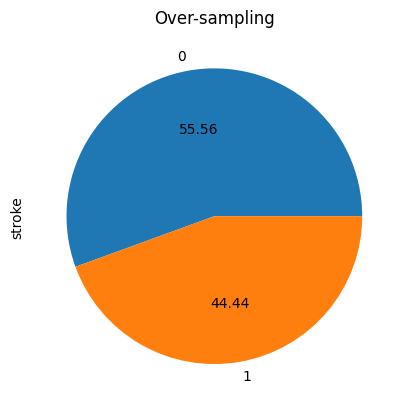

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,28.1
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0
...,...,...,...,...,...
8744,61.0,1,1,112.24,37.4
8745,57.0,0,0,197.28,34.5
8746,58.0,0,1,240.59,31.4
8747,75.0,0,0,62.48,28.1


In [56]:
# from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.8
# rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
# X_res, y_res = rus.fit_resample(X, y)
autopct = "%.2f"
# ax = y_res.value_counts().plot.pie(autopct=autopct)
# _ = ax.set_title("Under-sampling")
# plt.show()
# y_res.value_counts()

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_s, y_s = ros.fit_resample(X, y)
ax = y_s.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Over-sampling")
plt.show()
X_s

# sampling_strategy = "not minority"
# fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
# rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
# X_res, y_res = rus.fit_resample(X, y)
# y_res.value_counts().plot.pie(autopct=autopct, ax=axs[0])
# axs[0].set_title("Under-sampling")
# print("1: ", y_res.value_counts())

# sampling_strategy = "not majority"
# ros = RandomOverSampler(sampling_strategy=sampling_strategy)
# X_s, y_s = ros.fit_resample(X, y)
# y_s.value_counts().plot.pie(autopct=autopct, ax=axs[1])
# _ = axs[1].set_title("Over-sampling")
# plt.show()
# print("2: ", y_s.value_counts())

In [ ]:
y_s.value_counts()

In [58]:
X_s

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,28.1
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0
...,...,...,...,...,...
8744,61.0,1,1,112.24,37.4
8745,57.0,0,0,197.28,34.5
8746,58.0,0,1,240.59,31.4
8747,75.0,0,0,62.48,28.1


In [59]:
y_s

0       1
1       1
2       1
3       1
4       1
       ..
8744    1
8745    1
8746    1
8747    1
8748    1
Name: stroke, Length: 8749, dtype: int64

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(X_s.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'])
df_scaled

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,0.816895,0.0,1.0,0.801265,0.301260
1,0.743652,0.0,0.0,0.679023,0.203895
2,0.975586,0.0,1.0,0.234512,0.254296
3,0.597168,0.0,0.0,0.536008,0.276060
4,0.963379,1.0,0.0,0.549349,0.156930
...,...,...,...,...,...
8744,0.743652,1.0,1.0,0.263688,0.310424
8745,0.694824,0.0,0.0,0.656264,0.277205
8746,0.707031,0.0,1.0,0.856200,0.241695
8747,0.914551,0.0,0.0,0.033977,0.203895


In [63]:
#разбиваем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y_s, test_size=.5, random_state=0)

X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi
2612,0.768066,0.0,0.0,0.744437,0.277205
4763,1.000000,0.0,0.0,0.749931,0.265750
2106,0.328613,0.0,0.0,0.201228,0.180985
2689,0.462891,0.0,0.0,0.207414,0.120275
2729,0.169922,0.0,0.0,0.402825,0.083620
...,...,...,...,...,...
4373,0.023438,0.0,0.0,0.096944,0.074456
7891,0.914551,0.0,0.0,0.665128,0.186712
4859,0.523926,0.0,0.0,0.051242,0.276060
3264,0.743652,0.0,0.0,0.077971,0.179840


In [64]:
from sklearn.linear_model import LogisticRegression

#настройка параметров модели
model = LogisticRegression()
y_scor=model.fit(X_train, y_train)
y_score=y_scor.predict(X_test)

In [65]:
from sklearn import metrics
# оценка точности модели
print(metrics.classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2430
           1       0.73      0.76      0.74      1945

    accuracy                           0.77      4375
   macro avg       0.77      0.77      0.77      4375
weighted avg       0.77      0.77      0.77      4375



Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

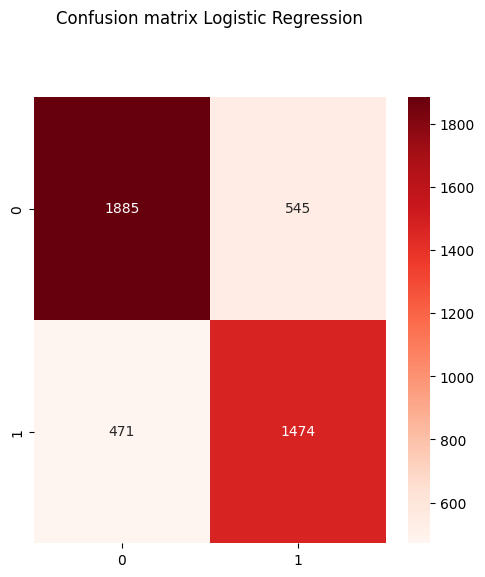

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig = plt.figure(figsize = (5,5))
ax = fig.gca()

# матрица неточности
cnf_matrix_log = confusion_matrix(y_test, y_score)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

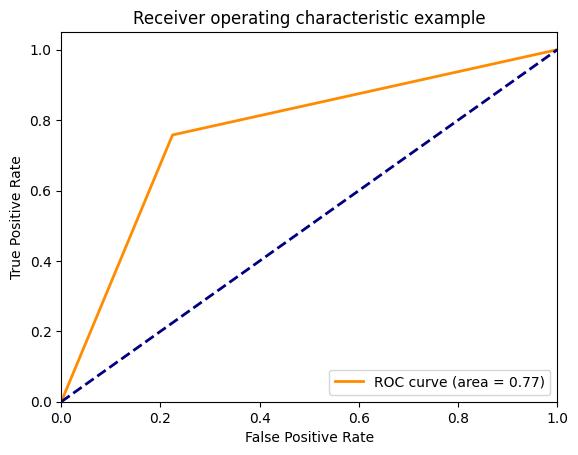

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()